# Try Fastai

Fastai provides an API for semantic segmentation. The first attempt is to learn how to use it.

In [49]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

from pathlib import Path
import os
import random

from fastai.callbacks.hooks import *
from fastai.utils.mem import *

import random

## Preparation

Main challenge with fastai is the creation of databunch. After that its all straightforward.

In [50]:
PROJ_DIR = Path(os.path.abspath("")).parent
PROJ_DIR

WindowsPath('c:/Pankaj/Projects/00-Learning/Kaggle/cloud')

In [51]:
path_train_img = PROJ_DIR / "data" / "raw" / "train_images"
path_train_labels = PROJ_DIR / "data" / "raw" / "train_labels"
path_test_img = PROJ_DIR / "data" / "raw" / "test_images"

In [52]:
fnames = get_image_files(path_train_img)
fnames[:3]

[WindowsPath('c:/Pankaj/Projects/00-Learning/Kaggle/cloud/data/raw/train_images/0011165.jpg'),
 WindowsPath('c:/Pankaj/Projects/00-Learning/Kaggle/cloud/data/raw/train_images/002be4f.jpg'),
 WindowsPath('c:/Pankaj/Projects/00-Learning/Kaggle/cloud/data/raw/train_images/0031ae9.jpg')]

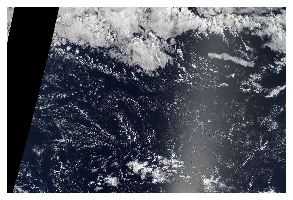

In [55]:
img_f = random.choice(fnames)
img = open_image(img_f)
img.show(figsize=(5, 5))

In [56]:
get_y_fn = lambda x: path_train_labels / f"{x.stem}.png"

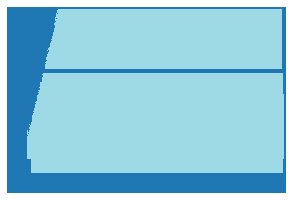

In [57]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

### Reading Labels

In [68]:
codes = ["background", "Fish", "Flower", "Gravel", "Sugar"]
codes

['background', 'Fish', 'Flower', 'Gravel', 'Sugar']

## Create DataBunch

In [59]:
free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200:
    bs = 8
else:
    bs = 4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=4, have 0MB of GPU RAM free


In [60]:
src_size = np.array(img.shape[1:])
src_size

array([1400, 2100])

In [61]:
size = src_size // 4
size

array([350, 525], dtype=int32)

In [38]:
# Did not work because of transformations
data = (
    SegmentationItemList.from_folder(path_train_img)
    .split_by_rand_pct()
    .label_from_func(get_y_fn, classes=codes)
    .add_test_folder(path_test_img)
    .transform(get_transforms(), size=size, tfm_y=False)
    .databunch(bs=bs)
    .normalize(imagenet_stats)
)

data

ImageDataBunch;

Train: LabelList (4437 items)
x: SegmentationItemList
Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525)
y: SegmentationLabelList
ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100)
Path: c:\Pankaj\Projects\00-Learning\Kaggle\cloud\data\raw\train_images;

Valid: LabelList (1109 items)
x: SegmentationItemList
Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525)
y: SegmentationLabelList
ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100)
Path: c:\Pankaj\Projects\00-Learning\Kaggle\cloud\data\raw\train_images;

Test: LabelList (3698 items)
x: SegmentationItemList
Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525)
y: EmptyLabelList
,,,,
Path: c:\Pa

In [41]:
#RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:62] data. DefaultCPUAllocator: not enough memory: you tried to allocate %dGB. Buy new RAM!9
data = (
    SegmentationItemList.from_folder(path_train_img)
    .split_by_rand_pct()
    .label_from_func(get_y_fn, classes=codes)
    .add_test_folder(path_test_img)
    .databunch(bs=bs)
    .normalize(imagenet_stats)
)

data

ImageDataBunch;

Train: LabelList (4437 items)
x: SegmentationItemList
Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100)
y: SegmentationLabelList
ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100)
Path: c:\Pankaj\Projects\00-Learning\Kaggle\cloud\data\raw\train_images;

Valid: LabelList (1109 items)
x: SegmentationItemList
Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100)
y: SegmentationLabelList
ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100)
Path: c:\Pankaj\Projects\00-Learning\Kaggle\cloud\data\raw\train_images;

Test: LabelList (3698 items)
x: SegmentationItemList
Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100)
y: E

In [62]:
# Did not work because of transformations
data = (
    SegmentationItemList.from_folder(path_train_img)
    .split_by_rand_pct()
    .label_from_func(get_y_fn, classes=codes)
    .transform(get_transforms(), size=size, tfm_y=True)
    .databunch(bs=bs)
    .normalize(imagenet_stats)
)

data

ImageDataBunch;

Train: LabelList (4437 items)
x: SegmentationItemList
Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525)
y: SegmentationLabelList
ImageSegment (1, 350, 525),ImageSegment (1, 350, 525),ImageSegment (1, 350, 525),ImageSegment (1, 350, 525),ImageSegment (1, 350, 525)
Path: c:\Pankaj\Projects\00-Learning\Kaggle\cloud\data\raw\train_images;

Valid: LabelList (1109 items)
x: SegmentationItemList
Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525),Image (3, 350, 525)
y: SegmentationLabelList
ImageSegment (1, 350, 525),ImageSegment (1, 350, 525),ImageSegment (1, 350, 525),ImageSegment (1, 350, 525),ImageSegment (1, 350, 525)
Path: c:\Pankaj\Projects\00-Learning\Kaggle\cloud\data\raw\train_images;

Test: None

In [66]:
wd = 1e-2
bs=1

In [64]:
learn = unet_learner(data, models.resnet18, wd=wd)

In [69]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: Assertion `cur_target >= 0 && cur_target < n_classes' failed.  at ..\aten\src\THNN/generic/ClassNLLCriterion.c:92

In [ ]:
learn.recorder.plot()